# Task 1: Data Exploration and Enrichment
Analysis of Ethiopia's financial inclusion data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_theme(style="whitegrid")

In [2]:
# Load data
data_path = "../data/raw/ethiopia_fi_unified_data.csv"
df = pd.read_csv(data_path)

# Display basic info
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

Dataset Shape: (22, 20)

Columns: ['record_type', 'pillar', 'indicator', 'indicator_code', 'value_numeric', 'observation_date', 'source_name', 'source_url', 'confidence', 'category', 'parent_id', 'related_indicator', 'impact_direction', 'impact_magnitude', 'lag_months', 'evidence_basis', 'original_text', 'collected_by', 'collection_date', 'notes']


In [3]:
# count by record_type
print("\nRecord Counts by Type:")
print(df['record_type'].value_counts())


Record Counts by Type:
record_type
observation    16
event           4
target          1
impact_link     1
Name: count, dtype: int64



Saved figure: account_ownership_trend.png


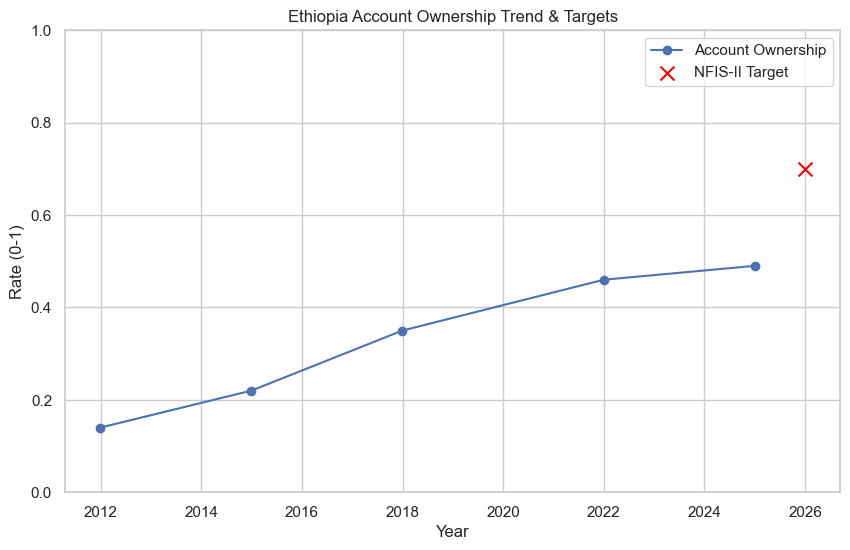

In [ ]:
# Filter Observations
obs = df[df['record_type'] == 'observation']

# Plot Account Ownership Trend
plt.figure(figsize=(10, 6))
acc_own = obs[obs['indicator_code'] == 'account_ownership'].sort_values('observation_date')
plt.plot(pd.to_datetime(acc_own['observation_date']), acc_own['value_numeric'], marker='o', linestyle='-', label='Account Ownership')

# Add targets if any
targets = df[df['record_type'] == 'target']
acc_target = targets[targets['indicator_code'] == 'account_ownership_target']
plt.scatter(pd.to_datetime(acc_target['observation_date']), acc_target['value_numeric'], color='red', marker='x', s=100, label='NFIS-II Target')

plt.title('Ethiopia Account Ownership Trend & Targets')
plt.xlabel('Year')
plt.ylabel('Rate (0-1)')
plt.legend()
plt.ylim(0, 1)
plt.savefig('../reports/figures/account_ownership_trend.png') 
print("\nSaved figure: account_ownership_trend.png")


In [5]:
# Enrichments Check
print("\n--- Enriched Data Points (Collected Today) ---")
new_data = df[df['collection_date'] == '2026-01-29'][['record_type', 'indicator', 'value_numeric', 'source_name', 'observation_date']]
new_data


--- Enriched Data Points (Collected Today) ---


,record_type,indicator,value_numeric,source_name,observation_date
0,observation,Account Ownership,0.1400,Global Findex,2011-12-31
1,observation,Account Ownership,0.2200,Global Findex,2014-12-31
2,observation,Account Ownership,0.3500,Global Findex,2017-12-31
3,observation,Account Ownership,0.4600,Global Findex,2021-12-31
4,observation,Account Ownership,0.4900,Global Findex 2024,2024-12-31
5,observation,Mobile Money Account Ownership,0.0945,Global Findex 2024,2024-12-31
6,observation,Made or received digital payment,0.3500,Official Report,2024-12-31
7,observation,Used account to receive wages,0.1500,Official Report,2024-12-31
8,observation,Account Ownership (Men),0.5700,Shega/Findex Analysis,2024-12-31
9,observation,Account Ownership (Women),0.4200,Shega/Findex Analysis,2024-12-31
